In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

trainfile = open('./data/train.pkl' , 'rb')
train_data = pickle.load(trainfile)
trainfile.close()

testfile = open('./data/test.pkl' , 'rb')
test_data = pickle.load(testfile)
testfile.close()

In [2]:
np.random.shuffle(train_data)
xtrain , ytrain = np.hsplit(train_data , 2)
X_train = np.array_split(xtrain , 10)
Y_train = np.array_split(ytrain , 10)

X_test , Y_test = np.hsplit(test_data , 2)

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

n = Y_test.shape[0]
bias_final = []
variance_final = []
irr_error_final = []
# For 20 degrees
for j in range(1, 21):
    Y_predict_final = np.empty(shape=[n,0])
    
    # For 10 Training Sets
    for i in range(10):
        linear_regression = LinearRegression()
        poly = PolynomialFeatures(j)
        X_POLY = poly.fit_transform(X_train[i])
        linear_regression.fit(X_POLY , Y_train[i])
        Y_predict = linear_regression.predict(poly.fit_transform(X_test))
        Y_predict_final = np.append(Y_predict_final , Y_predict , axis = 1)
           
    # Calculating Bias    
    Y_predict_exp = np.mean(Y_predict_final , axis = 1)
    Y_predict_exp = Y_predict_exp.reshape(Y_predict_exp.shape[0] , 1)
    bias = np.subtract(Y_predict_exp , Y_test)
    
    # Bias Square
    bias_sqr = np.square(bias)
    
    # Calculating Variance
    variance = np.subtract(Y_predict_final , Y_predict_exp)
    variance = np.square(variance)
    variance = np.mean(variance , axis = 1)
    variance = variance.reshape(variance.shape[0] , 1)
    
    # Calculating Irreducible Error
    pred_real = np.subtract(Y_predict_final , Y_test)
    pred_real = np.square(pred_real)
    pred_real_exp = np.mean(pred_real , axis = 1)
    pred_real_exp = pred_real_exp.reshape(pred_real_exp.shape[0] , 1)
    bias_var = np.add(bias_sqr , variance)
    irr_error = np.subtract(pred_real_exp , bias_var)
    
    # Calculating mean bias , mean variance and mean irreducible error for a model complexity
    bias_mean = np.mean(np.absolute(bias) , axis = 0)
    bias_final.append(bias_mean[0])
    
    variance_mean = np.mean(np.absolute(variance) , axis = 0)
    variance_final.append(variance_mean[0])
    
    irr_error_mean = np.mean(irr_error , axis = 0)
    irr_error_final.append(irr_error_mean[0])

# Changing lists into np array    
    
bias_final = np.array(bias_final)
bias_final = bias_final.reshape(bias_final.shape[0], 1)

variance_final = np.array(variance_final)
variance_final = variance_final.reshape(variance_final.shape[0], 1)

irr_error_final = np.array(irr_error_final)
irr_error_final = irr_error_final.reshape(irr_error_final.shape[0], 1)

# Calculating Total Error
bias_sqr_final = np.square(bias_final)
total_error = np.add(bias_sqr_final , variance_final)
total_error = np.add(total_error , irr_error_final)

bias_table = bias_final.flatten()
variance_table = variance_final.flatten()

errors = {
    'Bias' : bias_table,
    'Variance' : variance_table
}

df = pd.DataFrame(errors, columns = ['Bias', 'Variance'] , index = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])

print (df)
#print('Bias')
#print(bias_final)
#print('Bias Square')
#print(bias_sqr_final)
#print('Variance')
#print(variance_final)
print('Irreducible Error')
print(irr_error_final)
#print('Total Error')
#print(total_error)

Bias       Variance
1   820.487724   44821.852467
2   812.108093   75298.684912
3    64.745233   75674.148112
4    74.110162  118088.721997
5    72.884775  126802.823520
6    72.484538  143181.677809
7    77.018498  160818.828189
8    82.117255  190781.017047
9    81.423179  205001.990354
10   86.643432  200111.074461
11   78.898843  186108.928566
12  121.149345  213769.137079
13   81.064630  191679.478972
14  123.700128  212002.000739
15  164.310184  209908.039997
16  172.998916  237624.268147
17  245.630496  234353.208221
18  247.844407  264392.695398
19  316.571303  262017.018659
20  315.969581  295189.095330
Irreducible Error
[[ 1.77351467e-11]
 [ 7.62156560e-11]
 [ 1.07320375e-11]
 [-5.36601874e-12]
 [-4.09272616e-12]
 [ 3.63797881e-13]
 [ 1.54614099e-12]
 [-1.36424205e-11]
 [-1.30967237e-11]
 [ 4.72937245e-12]
 [ 1.46428647e-11]
 [-2.54658516e-12]
 [ 9.91349225e-12]
 [ 2.96495273e-11]
 [ 2.43744580e-11]
 [ 1.30967237e-11]
 [-1.06410880e-11]
 [ 2.22826202e-11]
 [-2.81943358e-12]
 

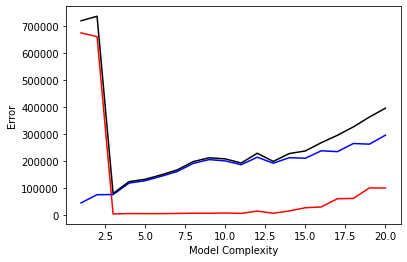

In [4]:
model_complexity = np.array([[1] , [2] , [3] , [4] , [5] , [6] , [7] , [8] , [9] , [10] , [11] , [12] , [13] , [14] , [15] , [16] , [17] , [18] , [19] , [20]])
plt.plot(model_complexity , bias_sqr_final , color="red")
plt.plot(model_complexity , variance_final , color="blue")
plt.plot(model_complexity , total_error , color="black")
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.show()